In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from gym_custom_player import GymCustomPlayer, BinaryStates, ExplorationApproach
from qlearn import plot_rewards

## Wumpus-v0 (BinaryStates.BASIC)

### Decaying epsilon greedy

epsilon=0.9, epsilon_decay=0.01, epsilon_min=0.01

<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

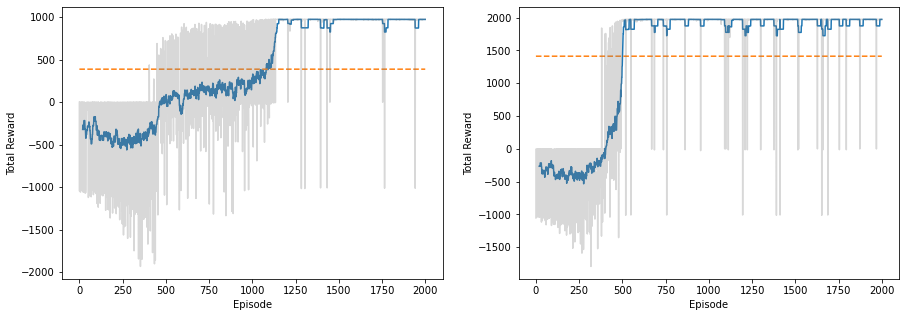

In [2]:
gym_env = gym.make('wumpus-v0')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

gym_custom_player = GymCustomPlayer(gym_env, BinaryStates.BASIC, grab_reward=False, expl_approach=ExplorationApproach.DECAYING_EPSILON_GREEDY)
q_table, rewards = gym_custom_player.train(episodes=2000)
plot_rewards(rewards, ax=axes[0])

gym_custom_player = GymCustomPlayer(gym_env, BinaryStates.BASIC, grab_reward=True, expl_approach=ExplorationApproach.DECAYING_EPSILON_GREEDY)
q_table, rewards = gym_custom_player.train(episodes=2000)
plot_rewards(rewards, ax=axes[1])

In [3]:
final_reward, frames = gym_custom_player.run_episode(gym_env) 

print("Initial configuration:")
print(frames[0])

print("Final configuration:")
print(frames[-1])

print('Final reward {} in {} steps'.format(final_reward, len(frames)))

Initial configuration:
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │W  │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│ G │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│   │   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
│ @^│   │   │   │   │   │
└───┴───┴───┴───┴───┴───┘
Final configuration:
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │W  │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│   │   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
│ @<│   │   │   │   

### Epsilon jump

EpsilonJump(0.8, 0.9, 0.01)

<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

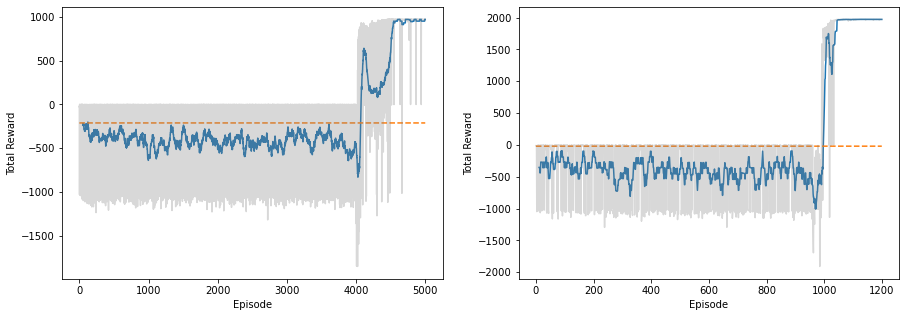

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

gym_custom_player = GymCustomPlayer(gym_env, BinaryStates.BASIC, grab_reward=False, expl_approach=ExplorationApproach.EPSILON_JUMP)
q_table, rewards = gym_custom_player.train(episodes=5000)
plot_rewards(rewards, ax=axes[0])

gym_custom_player = GymCustomPlayer(gym_env, BinaryStates.BASIC, grab_reward=True, expl_approach=ExplorationApproach.EPSILON_JUMP)
q_table, rewards = gym_custom_player.train(episodes=1200)
plot_rewards(rewards, ax=axes[1])

In [5]:
final_reward, frames = gym_custom_player.run_episode(gym_env) 

print("Initial configuration:")
print(frames[0])

print("Final configuration:")
print(frames[-1])

print('Final reward {} in {} steps'.format(final_reward, len(frames)))

Initial configuration:
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │W  │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│ G │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│   │   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
│ @^│   │   │   │   │   │
└───┴───┴───┴───┴───┴───┘
Final configuration:
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │W  │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│   │   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
│ @<│   │   │   │   

### Comparison with online player

In [6]:
import sys
sys.path.append("../wumpus_online")
import custom_player, wumpus

# Comparison with online player
world = {
    "id": "wumpus-v0",
    "size": [6, 6],
    "hunters": [[0, 0, "N"]],
    "pits": [[0, 5], [5, 1], [3, 1], [3, 3], [2, 2], [4, 3], [3, 5]],
    "wumpuses": [[5, 4]],
    "golds": [[5, 3]]
}

ep_res = wumpus.run_episode(wumpus.WumpusWorld.from_JSON(world), custom_player.CustomPlayer(), show=True, horizon=100)

Exception in Player.start_episode: __init__() got an unexpected keyword argument 'truth_threshold'
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │W  │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│ G │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│   │   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
│ @^│   │   │   │   │   │
└───┴───┴───┴───┴───┴───┘
Exception in Player.play: 'CustomPlayer' object has no attribute 'game_env'
Episode terminated by the player CustomPlayer_bd8f24f0.
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │W  │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│ G │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│  

### Using the complete state

<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

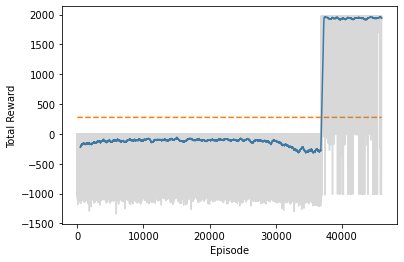

In [16]:
gym_custom_player = GymCustomPlayer(gym_env, BinaryStates.COMPLETE, grab_reward=True, expl_approach=ExplorationApproach.EPSILON_JUMP)
q_table, rewards = gym_custom_player.train(episodes=46000)
plot_rewards(rewards)

## Wumpus-mandatory-kill-v0 (BinaryStates.ADVANCED)

### Decaying epsilon greedy

epsilon=0.9, epsilon_decay=0.0001 and 0.0005, epsilon_min=0.01

c:\Users\samue\anaconda3\envs\aima2021\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment wumpus-mandatory-kill-v0
  logger.warn("Overriding environment {}".format(id))


<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

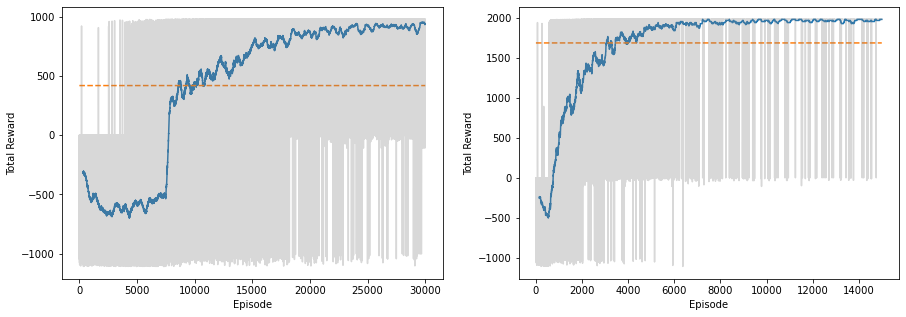

In [13]:
# Gold reachable only with kill
gym.envs.register(
    id='wumpus-mandatory-kill-v0',
    entry_point='gym_wumpus.envs:wumpusenv_from_dict',
    max_episode_steps=100,
    nondeterministic=False,
    kwargs={
        'desc': {
            "id": "wumpus-mandatory-kill",
            "size": [6, 6],
            "hunters": [[0, 0, "N"]],
            "pits": [[0, 5], [5, 1], [3, 1], [3, 3], [2, 2], [4, 3], [3, 5],[5,4]],
            "wumpuses": [[2, 0]],
            "golds": [[3, 0]]
        }
    }
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
gym_env = gym.make('wumpus-mandatory-kill-v0')

gym_custom_player = GymCustomPlayer(gym_env, BinaryStates.ADVANCED, expl_approach=ExplorationApproach.DECAYING_EPSILON_GREEDY, grab_reward=False)
q_table, rewards = gym_custom_player.train(episodes=30000, epsilon_decay=0.0001)
plot_rewards(rewards, ax=axes[0])

gym_custom_player = GymCustomPlayer(gym_env, BinaryStates.ADVANCED, expl_approach=ExplorationApproach.DECAYING_EPSILON_GREEDY, grab_reward=True)
q_table, rewards = gym_custom_player.train(episodes=15000, epsilon_decay=0.0005)
plot_rewards(rewards, ax=axes[1])

In [14]:
final_reward, frames = gym_custom_player.run_episode(gym_env) 

print("Initial configuration:")
print(frames[0])

print("Final configuration:")
print(frames[-1])

print('Final reward {} in {} steps'.format(final_reward, len(frames)))

Initial configuration:
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│   │   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │W  │ G │   │   │
│ @^│   │   │   │   │   │
└───┴───┴───┴───┴───┴───┘
Final configuration:
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│   │   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
│ @<│   │   │   │   

## Wumpus-no-solution-v0 (BinaryStates.COMPLETE)

### Decaying epsilon greedy

epsilon=0.9, epsilon_decay=0.0001 and 0.0005, epsilon_min=0.01

<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

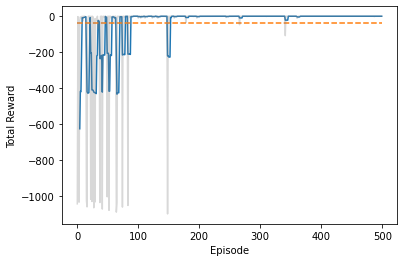

In [2]:
# Gold reachable only with kill
gym.envs.register(
    id='wumpus-no-solution-v0',
    entry_point='gym_wumpus.envs:wumpusenv_from_dict',
    max_episode_steps=100,
    nondeterministic=False,
    kwargs={
        'desc': {
            "id": "wumpus-no-solution",
            "size": [6, 6],
            "hunters": [[0, 0, "N"]],
            "pits": [[2, 0], [0, 5], [5, 1], [3, 1], [3, 3], [2, 2], [4, 3], [3, 5], [5, 4]],
            "wumpuses": [],
            "golds": [[3, 0]]
        }
    }
)
gym_env = gym.make('wumpus-no-solution-v0')

gym_custom_player = GymCustomPlayer(gym_env, BinaryStates.COMPLETE, expl_approach=ExplorationApproach.DECAYING_EPSILON_GREEDY, grab_reward=False)
q_table, rewards = gym_custom_player.train(episodes=500)
plot_rewards(rewards)

In [10]:
final_reward, frames = gym_custom_player.run_episode(gym_env) 

print("Initial configuration:")
print(frames[0])

print("Final configuration:")
print(frames[-1])

print('Final reward {} in {} steps'.format(final_reward, len(frames)))

Initial configuration:
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│   │   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│ G │   │   │
│ @^│   │   │   │   │   │
└───┴───┴───┴───┴───┴───┘
Final configuration:
┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│   │   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │  P│ G │   │   │
│ @^│   │   │   │   